<hr style="border-color: black; height: 0.1px">

# Part 1. Gradient Boosting Theoretical Understanding

### 1.1 What is Gradient Boosting?

Gradient Boosting is a machine learning techinique that can be used in both regression and classification tasks. It gives a prediction model using an ensemble method (<i>also known as using mutiple learning algorithms</i>) to achieve better predictive performance.

It is a technique whereby the models are built sequentially and with each iteration, the model is "improved" by learning from the errors of the previous model and building on top of it (<i>or known as residuals</i>).

Typically, the steps to building a gradient boosting model are as follows:

1. Build a model and make predictions on a given data.
2. Calculate the error and set this error as target.
3. Build the model on top of the errors and make predictions.
4. Update predictions of model 1.
5. Repeat Step 2 to Step 4. (either until the number of iterations have been met or the error is close or = 0)

Visually, it can be represented like this:

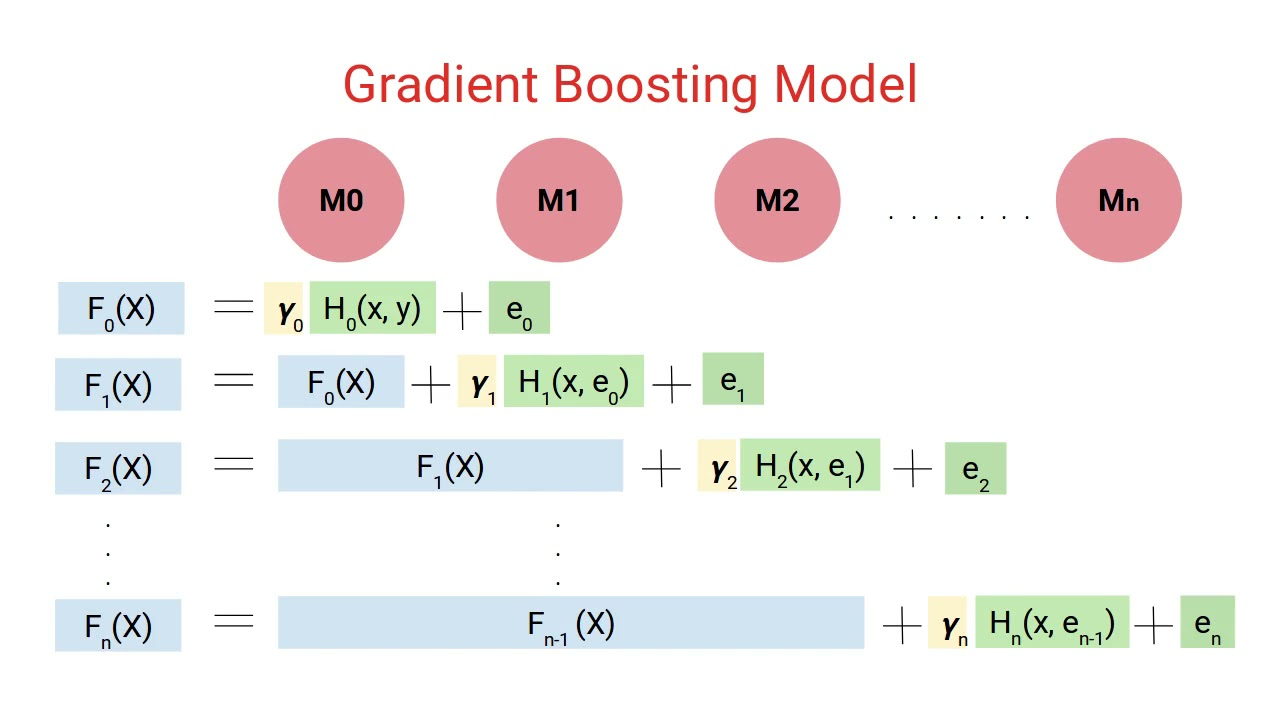<br>
<i>Saxena, S (2021)</i>

Legend:
| Symbol | Description |
| ----------- | ----------- |
| M<sub>n</sub> | Number of Iterations |
| F<sub>0</sub>(X) | Base Predictive Model |
| H<sub>n</sub>(X, y) | Function of that iteration |
| $\gamma$<sub>n</sub> | Gamma or Weight/Coefficient (the gradient) |
| e<sub>n</sub> | Error of that iteration |
| $\chi$ | Feature |
| y | Target |
| F<sub>1</sub>(X) | First Predictive Model (built ontop of F<sub>0</sub>(X)) |
| F<sub>n</sub>(X) | N Predictive Model (built ontop of F<sub>n-1</sub>(X)) |

<b>Gradient  Boosting Decision Tree</b><br>
Gradient Boosting Decision Tree is another variant where each H<sub>n</sub>(X, y) is a decision tree. The $\gamma$ is calculated at every leaf level and <b>not</b> at the overall model level. <br>
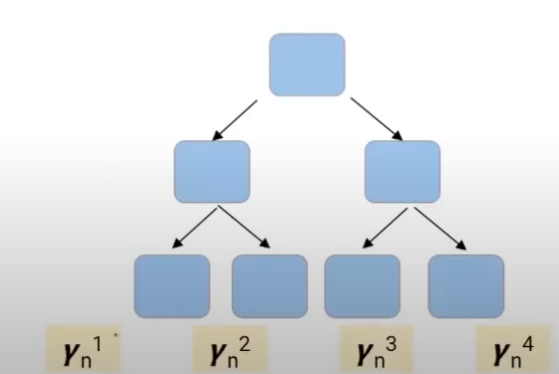

Typically, these are the strengths and weaknesses of a gradient boosting model: <br>

<b>Strengths</b>
- Excellent predictive accuracy
- Ton of flexibility

<b>Weaknesses</b>
- Can result in overfitting
- Can be computationally expensive
- High level of flexibility results in heavier emphasis on hyper-parameter tuning, or grid search

### 1.2 Section 6.3 Manual Calculation of 3rd and 4th decision tree

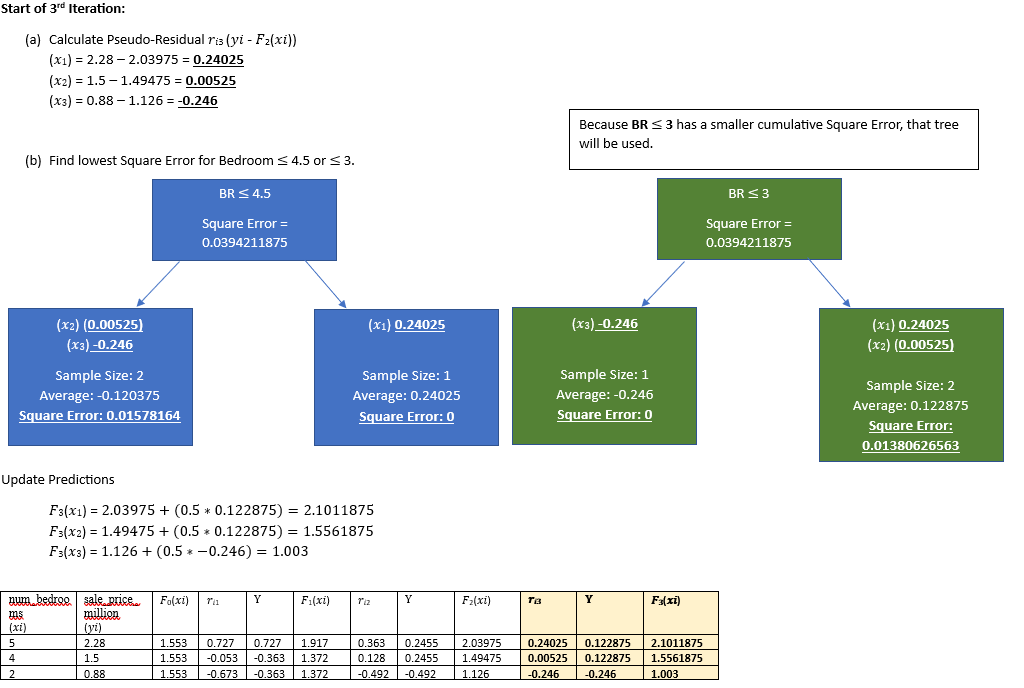

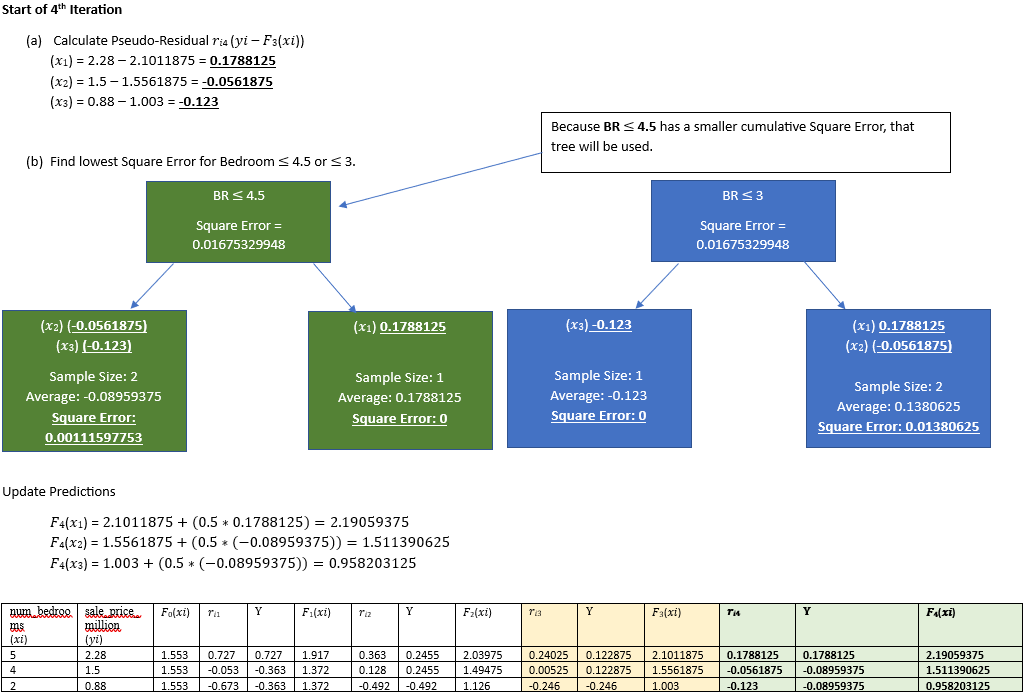

#### Comparison With SK Learn Package

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor

# The small dataset

data = np.array([[5,2.28],
                 [4,1.5],
                 [2,0.88]])

col_names = ['num_bedrooms', 'sale_price_million']

print(pd.DataFrame(data, columns=col_names), "\n")

X = data[:, 0].reshape(-1, 1) # all rows, 1st column
y = data[:, 1] # all rows, 2nd column

   num_bedrooms  sale_price_million
0           5.0                2.28
1           4.0                1.50
2           2.0                0.88 



In [2]:
# Compare the calculated values with the predicted values
# 3 iterations

gbr_3 = GradientBoostingRegressor(n_estimators=3, criterion='squared_error', learning_rate=0.5, max_depth=1)
gbr_3.fit(X, y)
calculated_val = np.array([2.1011875, 1.5561875, 1.003])
gbr_val = gbr_3.predict(X)

compare_df = pd.DataFrame({'calculated': calculated_val, 'gbr (3 iterations)': gbr_val})
compare_df

,calculated,gbr (3 iterations)
0,2.101187,2.101042
1,1.556188,1.556042
2,1.003000,1.002917


In [3]:
# 4 iterations

gbr_4 = GradientBoostingRegressor(n_estimators=4, criterion='squared_error', learning_rate=0.5, max_depth=1)
gbr_4.fit(X, y)
calculated_val = np.array([2.19059375, 1.511390625, 0.958203125])
gbr_val = gbr_4.predict(X)

compare_df = pd.DataFrame({'calculated': calculated_val, 'gbr (4 iterations)': gbr_val})
compare_df

,calculated,gbr (4 iterations)
0,2.190594,2.190521
1,1.511391,1.511302
2,0.958203,0.958177


# Part 2. Create Your Own Dataset to Build Gradient Boosting Model

#### 2.1 - Description of Dataset

The dataset created is a study on married individuals and their behaviour towards extra-marital affairs. <br>
This section describes the collection of attributes (input features) to understand if there are underlying patterns when married individuals engage in extra-marital affairs.

Legend:
| Input Feature (<i>x</i>) | Description | Type |
| ----------- | ----------- | ----------- |
| Gender| 0: male, 1: female | Categorical |
| Age | Age of participant | Continuous |
| Years_married | Number of years married | Continuous |
| Children | 0: No children, 1: Have Children| Categorical |
| Religiousness | 1: Anti, 2: Not At All, 3: Slightly, 4: Somewhat, 5: Very | Categorical|
| Education | 9: grade school, 12: high school graduate, 14: college, 16: college graduate, 17: post-graduate, 18: master's degree, 20: Ph.D., M.D., or other advanced degree. | Categorical |
| Occupation_rating| Occupation Satisfaction Level - 1: Terrible, 2: Very Bad, 3: Bad, 4: Average, 5: Good, 6: Satisfied, 7: Extremely Satisfied | Categorical |
| Marriage_rating | Marriage Life Satisfaction Level - 1: Terrible, 2: Bad, 3: Average, 4: Satisfied, 5: Extremely Satisfied | Categorical |
| Affairs_cat | 1: Committed extra marital affairs 0: Never comitted | Categorical |

#### 2.2/ 2.3 - Dependent Variable (<i>y</i>) and Non-trivial Deterministic Function <i>f</i>

The dependent variable <i>y</i> for this study would be whether or not the individual has cheated in their marriage life before. (0 for No and 1 for Yes).

Non-trivial deterministic Function: <Br>
$$ \frac{1}{e^{gender+1}}\ * \frac{log6(age^{yearsmarried})+\sqrt{religiousness^{2}+education^{2}+occupation^{2}} * children}{1+age^{marriagerating}} *10^{-3} $$
<br>
<br>

$$ \begin{align*}
y = \begin{cases}
1, & \text{score < 50} \\
0, & \text{score $\geq$ \text{50}}
\end{cases}
\end{align*}
$$

#### 2.4 - Gradient Boosting Machine Learning Model

In [4]:
# import libraries
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, log_loss
from sklearn.model_selection import GridSearchCV
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# load data
df = pd.read_excel('Affairs.xlsx')
df.head()

,gender_le,age,yearsmarried,children_le,religiousness,education,occupationrating,marriagerating,score,affairs_cat
0,1,19,10,0,0,16,5,1,0.019,1
1,0,20,3,0,4,16,5,1,0.020,1
2,1,21,7,0,1,17,5,1,0.021,1
3,0,22,2,0,1,18,1,1,0.022,1
4,1,22,20,0,2,16,5,1,0.022,1


##### 2.4.1 - EDA

In [5]:
# Exploratory Data Analysis
df.describe()

,gender_le,age,yearsmarried,children_le,religiousness,education,occupationrating,marriagerating,score,affairs_cat
count,1200.000000,1200.00000,1200.000000,1200.0000,1200.000000,1200.000000,1200.000000,1200.000000,1.200000e+03,1200.000000
mean,0.500000,44.41250,12.964167,0.6175,2.824167,15.609167,3.865000,3.351667,1.031329e+05,0.390833
std,0.500208,13.79103,9.222007,0.4862,1.474809,2.976093,1.605383,1.396886,2.730564e+05,0.488141
min,0.000000,18.00000,1.000000,0.0000,0.000000,9.000000,1.000000,1.000000,1.900000e-02,0.000000
25%,0.000000,34.00000,5.000000,0.0000,2.000000,14.000000,3.000000,2.000000,2.646068e+00,0.000000
50%,0.500000,44.00000,11.000000,1.0000,3.000000,16.000000,4.000000,4.000000,3.670313e+02,0.000000
75%,1.000000,56.00000,19.000000,1.0000,4.000000,18.000000,5.000000,5.000000,1.897479e+04,1.000000
max,1.000000,70.00000,40.000000,1.0000,5.000000,20.000000,7.000000,5.000000,1.680700e+06,1.000000


In [6]:
# Check for Null Values
df.isnull().sum()

gender_le           0
age                 0
yearsmarried        0
children_le         0
religiousness       0
education           0
occupationrating    0
marriagerating      0
score               0
affairs_cat         0
dtype: int64

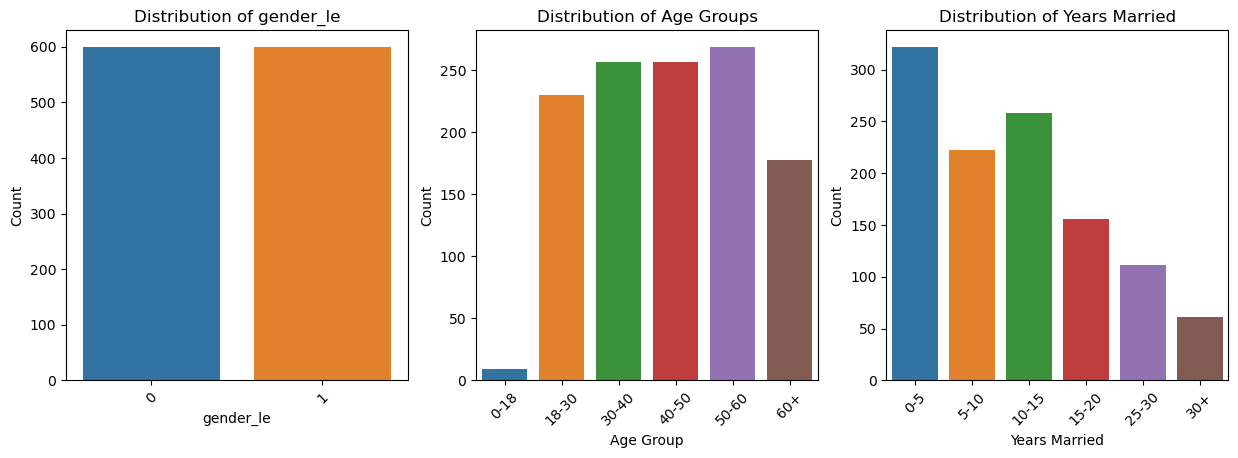

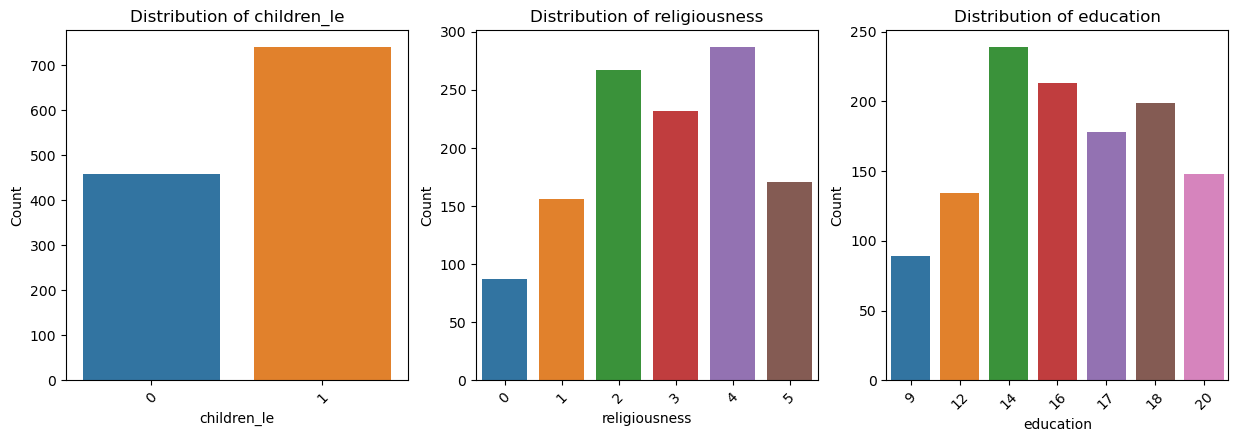

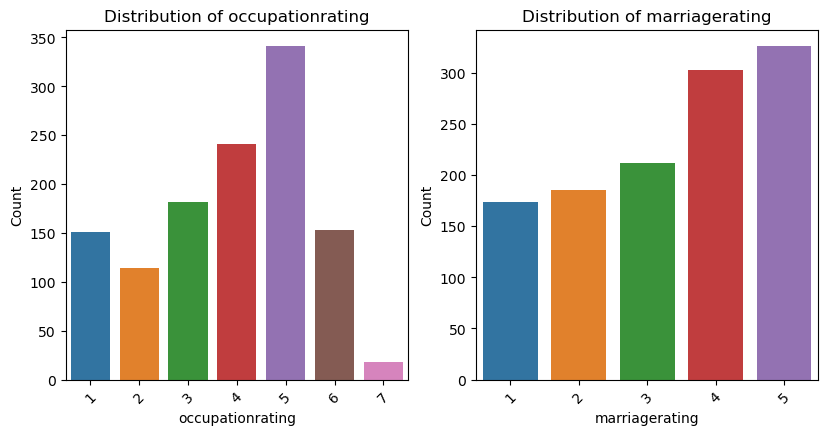

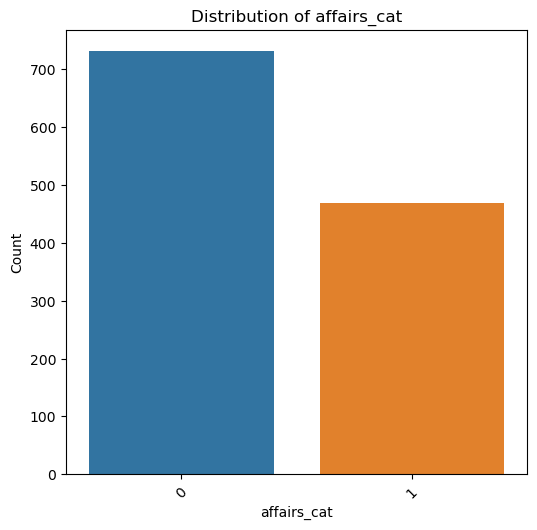

In [7]:
# Description of the data

index = 1
fig = plt.figure(figsize=(15, 10))
for column in list(df.columns):
    if index <= 3:
        if column != 'score':
            ax1 = fig.add_subplot(2, 3, index)
            plt.xticks(rotation=45)
            
            if column == 'age':
                # Binning the 'age' column into different age groups
                bins = [0, 18, 30, 40, 50, 60, 100]
                labels = ['0-18', '18-30', '30-40', '40-50', '50-60', '60+']
                df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)
                sns.countplot(data=df, x='age_group', ax=ax1)
                plt.xlabel('Age Group')
                plt.ylabel('Count')
                plt.title('Distribution of Age Groups')
                df.drop('age_group', axis=1, inplace=True)  # Remove the temporary 'age_group' column

            elif column == 'yearsmarried':
                
                # Bin the 'yearsmarried' column into different groups
                bins = [0, 5, 10, 15, 20, 25, 30]
                labels = ['0-5', '5-10', '10-15', '15-20', '25-30', '30+']
                df['yearsmarried_group'] = pd.cut(df['yearsmarried'], bins=bins, labels=labels)
                sns.countplot(data=df, x='yearsmarried_group', ax=ax1)
                plt.xlabel('Years Married')
                plt.ylabel('Count')
                plt.title('Distribution of Years Married')
                df.drop('yearsmarried_group', axis=1, inplace=True)  # Remove the temporary 'yearsmarried_group' column
            
            else:
                sns.countplot(data=df, x=column, ax=ax1)
                plt.xlabel(column)
                plt.ylabel('Count')
                plt.title(f'Distribution of {column}')
                
    index += 1
    if index == 4:
        fig = plt.figure(figsize=(15, 10))
        index = 1

plt.tight_layout()
plt.show()


<AxesSubplot:>

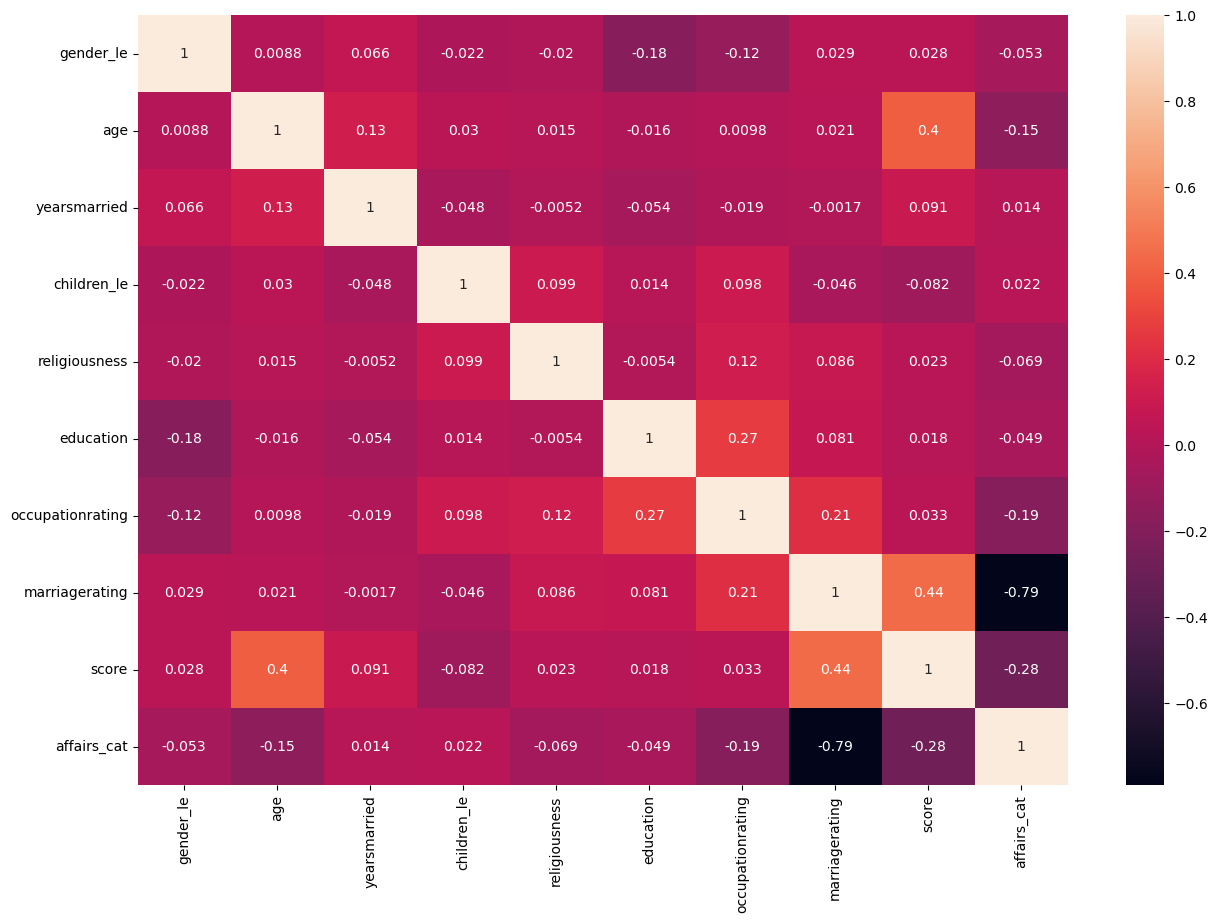

In [8]:
# Heatmap of the correlation between the features

plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True)

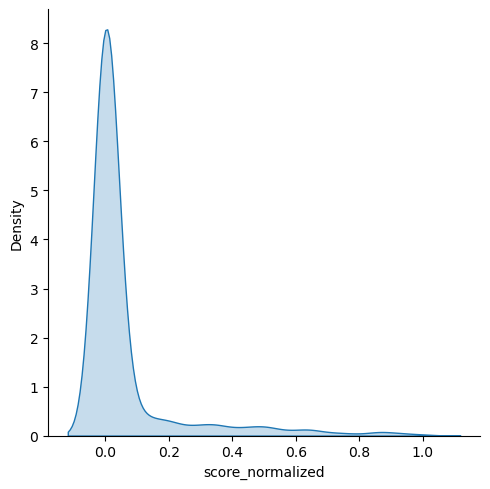

In [9]:
# Distribution of the score in stacked bar chart
df['score_normalized'] = MinMaxScaler().fit_transform(df[['score']])

sns.displot(data = df, x='score_normalized', kind='kde', fill=True)

##### 2.4.2 - Model Building & Prediction

In [10]:
# Drop score since this is a classification problem
df.drop(["score"], axis=1, inplace=True)

In [11]:
# Normalize the data except last 2 columns
df.iloc[:, :-2] = MinMaxScaler().fit_transform(df.iloc[:, :-2])
df.head()

,gender_le,age,yearsmarried,children_le,religiousness,education,occupationrating,marriagerating,affairs_cat,score_normalized
0,1.0,0.019231,0.230769,0.0,0.0,0.636364,0.666667,0.0,1,0.000000e+00
1,0.0,0.038462,0.051282,0.0,0.8,0.636364,0.666667,0.0,1,5.949901e-10
2,1.0,0.057692,0.153846,0.0,0.2,0.727273,0.666667,0.0,1,1.189980e-09
3,0.0,0.076923,0.025641,0.0,0.2,0.818182,0.000000,0.0,1,1.784970e-09
4,1.0,0.076923,0.487179,0.0,0.4,0.636364,0.666667,0.0,1,1.784970e-09


In [12]:
# Split the data into train and test
X = df.iloc[:, :-2]
Y = df['affairs_cat']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create GBR model
df_gbc = GradientBoostingClassifier()

# Fit the model
model = df_gbc.fit(X_train, y_train)

# Predict the model
y_pred = model.predict(X_test)

Score: 0.95
Accuracy: 0.95

 Confusion Matrix (base model)


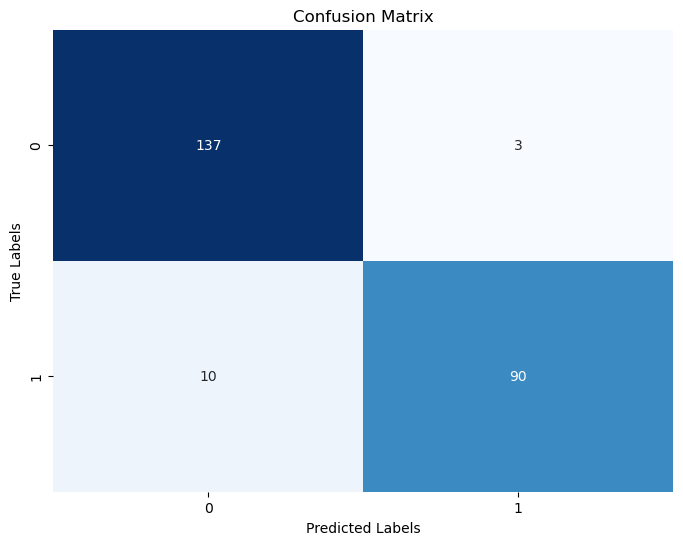

 
 Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95       140
           1       0.97      0.90      0.93       100

    accuracy                           0.95       240
   macro avg       0.95      0.94      0.94       240
weighted avg       0.95      0.95      0.95       240

 
 Log Loss: 1.9523645585771792
Log loss of 1.9524 can be improved using hyperparameter tuning.


In [13]:
# Score the model
# Score
print("="*30)
print("Score:", round(model.score(X_test, y_test),2))

# Accuracy
y_pred = model.predict(X_test)

print("Accuracy:", round(accuracy_score(y_test, y_pred),2))
print("="*30)

# Confusion Matrix
# Create a confusion matrix
print("\n Confusion Matrix (base model)")
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Classification Report
print("="*30)
print(" \n Classification Report:\n", classification_report(y_test, y_pred))
print("="*30)

# Log Loss
print("="*30)
print(" \n Log Loss:", log_loss(y_test, y_pred))
print(f"Log loss of {log_loss(y_test, y_pred):.4f} can be improved using hyperparameter tuning.")

##### 2.4.4 - Hyperparameter Tuning

In [14]:
# Hyperparameter Tuning
# Grid Search CV

LR = {
    "learning_rate": [0.001, 0.01, 0.075, 0.1, 0.25, 0.5, 0.75, 1],
    "max_depth":[1, 2, 3, 4, 5],
    "n_estimators":[1, 5, 10, 15, 30, 50, 75, 100]
    }

# Best hyperparameters: {'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 5}

# Create the model
best_gbc = GridSearchCV(GradientBoostingClassifier(), LR, cv=5, n_jobs=-1, verbose=1)
best_gbc.fit(X_train, y_train)

# print(tuned_gbc.best_score_)
print("Best hyperparameters:", best_gbc.best_params_)

# Create another model with the best hyperparameters
best_gbc = best_gbc.best_estimator_
y_pred = best_gbc.predict(X_test)

Fitting 5 folds for each of 320 candidates, totalling 1600 fits
Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 50}


Score: 0.96
Accuracy: 0.96

 Confusion Matrix (Tuned model)


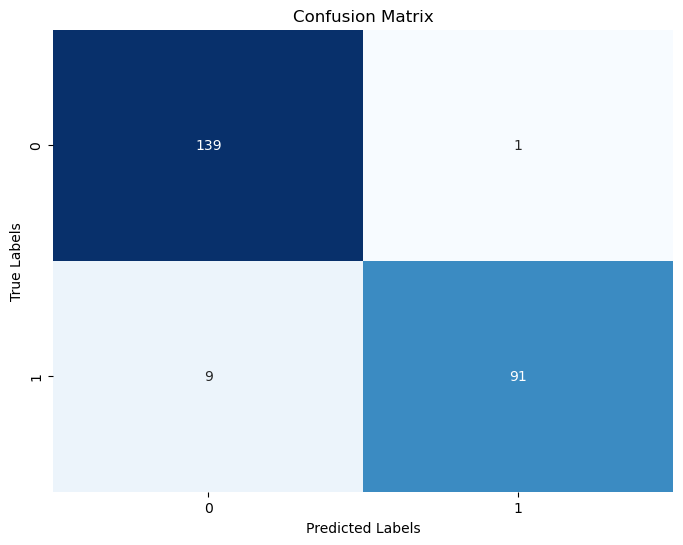

 
 Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.97       140
           1       0.99      0.91      0.95       100

    accuracy                           0.96       240
   macro avg       0.96      0.95      0.96       240
weighted avg       0.96      0.96      0.96       240

 
 Log Loss: 1.5018188912132147
Log loss reduced from 1.952 to 1.5018 after hyperparameter tuning.


In [15]:
# Score the model
# Score
print("="*30)
print("Score:", round(best_gbc.score(X_test, y_test),2))

# Accuracy
y_pred = best_gbc.predict(X_test)

print("Accuracy:", round(accuracy_score(y_test, y_pred),2))
print("="*30)

# Confusion Matrix
# Create a confusion matrix
print("\n Confusion Matrix (Tuned model)")
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Classification Report
print("="*30)
print(" \n Classification Report:\n", classification_report(y_test, y_pred))
print("="*30)

# Log Loss
print("="*30)
print(" \n Log Loss:", log_loss(y_test, y_pred))
print(f"Log loss reduced from 1.952 to {np.round(log_loss(y_test, y_pred), 4)} after hyperparameter tuning.")

##### 2.5 - Feature Importance

Feature importance represents the relative importance of each feature in the trained model. Generally, its significance is calculated based on how much each feature contributes to reducing the error in the model's prediction.

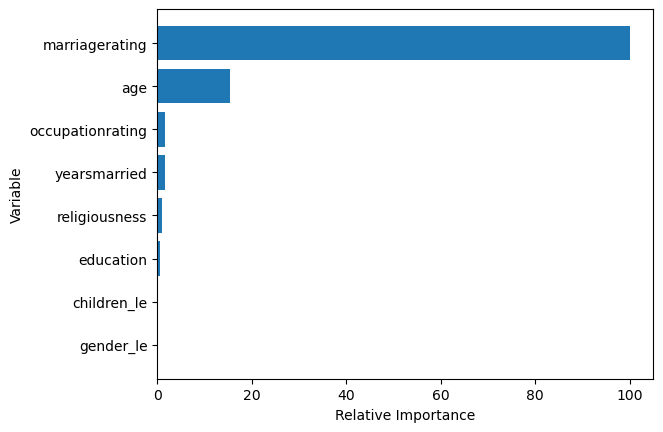

In [16]:
# Plot Feature Importance
feature_importance = best_gbc.feature_importances_

# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_index = np.argsort(feature_importance)
position = np.arange(sorted_index.shape[0]) + .5
plt.barh(position, feature_importance[sorted_index], align='center')
plt.yticks(position, X.columns[sorted_index])
plt.xlabel('Relative Importance')
plt.ylabel('Variable')
plt.show()

In this dataset, the marriagerating, age, occupationrating, yearsmarried have the most influence in the likelihood of an individual committing extra marital affairs.

##### 2.6 - Thoughts on Supervised Machine Learning

<span style="color:lightblue">*Essentially, supervised machine learning is just to establish the relationship between input (𝑥) and output (𝑦)”?*</span>

Essentially, yes.

During the training phase, the algorithm learns from the labeled examples by analyzing the patterns and relationships in the data. It tries to identify a function or model that can accurately predict the output labels for new, unseen inputs. The learned model captures the underlying relationship between the input and output, which can be used to make predictions on new, unseen data points.

The <span style = "color:orange">main objective </span> of supervised learning is to generalize from the training data and accurately predict the output labels for new, unseen inputs. The learned model can be evaluated and tested on a separate set of data called the test set to measure its performance and assess its ability to generalize to unseen examples.